This is a showcase of statistical analysis, including ecdfs, confidence intervals, and hypothesis testing.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(42)

In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional numpy array."""

    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

In [2]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    # Compute correlation matrix
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    
    # Initialize number of successes
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [6]:
def successive_poisson(tau1, tau2, size=1):
    """Total waiting time for the arrival of two different Poisson processes"""
    
    # Draw samples out of first exponential distribution
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates (sample with replacement) from a single numpy array."""

    # Initialize array of replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [43]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression, using underlying index."""

    # Set up array of indices to sample from
    inds = np.arange(len(x))

    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap and compute single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x,bs_y)

    return bs_replicates

In [11]:
def permutation_sample(data1, data2):
    """Generate a permutation sample (without replacement) from two data sets."""

    # Concatenate the data sets
    data = np.concatenate((data1,data2))

    # Permute the concatenated array
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [12]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

There are two species of finches which we will consider, G. scandens and G. fortis.  Beak depth and beak length are each measured in mm. First we compare scandens beak depth in 1975 with scandens beak depth in 2012, for our samples.

Data obtained from Dryad Digital Repository.

In [15]:
finch_beaks_2012 = pd.read_csv('finch_beaks_2012.csv')
print(finch_beaks_2012.head())

    band species  blength  bdepth
0  19022  fortis     10.0     8.5
1  19028  fortis     12.5     8.9
2  19032  fortis      9.3     7.5
3  19041  fortis     10.3     9.6
4  19044  fortis     11.0     9.2


In [18]:
scandens_depth_2012 = finch_beaks_2012.bdepth[finch_beaks_2012.species == 'scandens']
print(scandens_depth_2012)
print(type(scandens_depth_2012))

121     9.40
122     8.90
123     9.50
124    11.00
125     8.70
126     8.40
127     9.10
128     8.70
129    10.20
130     9.60
131     8.85
132     8.80
133     9.50
134     9.20
135     9.00
136     9.80
137     9.30
138     9.00
139    10.20
140     7.70
141     9.00
142     9.50
143     9.40
144     8.00
145     8.90
146     9.40
147     9.50
148     8.00
149    10.00
150     8.95
       ...  
218     8.40
219     8.30
220     9.60
221     9.40
222    10.00
223     8.90
224     9.10
225     9.80
226     9.30
227     9.90
228     8.90
229     8.50
230    10.60
231     9.30
232     8.90
233     8.90
234     9.70
235     9.80
236    10.50
237     8.40
238    10.00
239     9.00
240     8.70
241     8.80
242     8.40
243     9.30
244     9.80
245     8.90
246     9.80
247     9.10
Name: bdepth, Length: 127, dtype: float64
<class 'pandas.core.series.Series'>


In [20]:
bd_2012 = np.array(scandens_depth_2012)
print(bd_2012)
print(type(bd_2012))

[  9.4    8.9    9.5   11.     8.7    8.4    9.1    8.7   10.2    9.6
   8.85   8.8    9.5    9.2    9.     9.8    9.3    9.    10.2    7.7    9.
   9.5    9.4    8.     8.9    9.4    9.5    8.    10.     8.95   8.2    8.8
   9.2    9.4    9.5    8.1    9.5    8.4    9.3    9.3    9.6    9.2   10.
   8.9   10.5    8.9    8.6    8.8    9.15   9.5    9.1   10.2    8.4   10.
  10.2    9.3   10.8    8.3    7.8    9.8    7.9    8.9    7.7    8.9    9.4
   9.4    8.5    8.5    9.6   10.2    8.8    9.5    9.3    9.     9.2    8.7
   9.     9.1    8.7    9.4    9.8    8.6   10.6    9.     9.5    8.1    9.3
   9.6    8.5    8.2    8.     9.5    9.7    9.9    9.1    9.5    9.8    8.4
   8.3    9.6    9.4   10.     8.9    9.1    9.8    9.3    9.9    8.9    8.5
  10.6    9.3    8.9    8.9    9.7    9.8   10.5    8.4   10.     9.     8.7
   8.8    8.4    9.3    9.8    8.9    9.8    9.1 ]
<class 'numpy.ndarray'>


In [22]:
finch_beaks_1975 = pd.read_csv('finch_beaks_1975.csv')
scandens_depth_1975 = finch_beaks_1975['Beak depth, mm'][finch_beaks_1975.species == 'scandens']
bd_1975 = np.array(scandens_depth_1975)
print(bd_1975)

[  8.4    8.8    8.4    8.     7.9    8.9    8.6    8.5    8.9    9.1    8.6
   9.8    8.2    9.     9.7    8.6    8.2    9.     8.4    8.6    8.9    9.1
   8.3    8.7    9.6    8.5    9.1    9.     9.2    9.9    8.6    9.2    8.4
   8.9    8.5   10.4    9.6    9.1    9.3    9.3    8.8    8.3    8.8    9.1
  10.1    8.9    9.2    8.5   10.2   10.1    9.2    9.7    9.1    8.5    8.2
   9.     9.3    8.     9.1    8.1    8.3    8.7    8.8    8.6    8.7    8.
   8.8    9.     9.1    9.74   9.1    9.8   10.4    8.3    9.44   9.04   9.
   9.05   9.65   9.45   8.65   9.45   9.45   9.05   8.75   9.45   8.35]


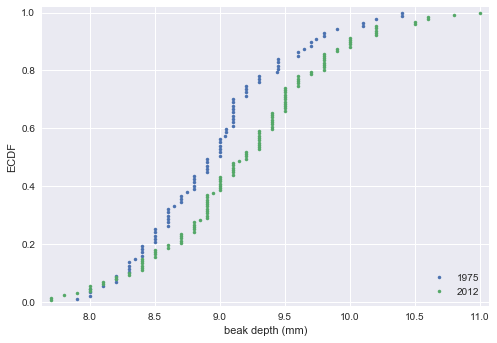

In [24]:
# Use seaborn default settings
sns.set()

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975,y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012,y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

Visually, it seems clear that beak depth has increased from 1975 to 2012, at least for our samples.  The above is graphical exploratory data analysis.

Next, we resample each of bd_1975 and bd_2012 10,000 times, with replacement.  We compute the mean beak depth each time, then compute the difference between arrays containing our 1975 and 2012 means, each of length 10,000.  Finally, we determine the 95% confidence interval for the following statistic: mean beak depth in 2012 minus mean beak depth in 1975 (assuming a normal distribution?).

In [26]:
# Compute the difference of the sample means
mean_diff = diff_of_means(bd_2012,bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,10000)

# Compute difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.05940465  0.39410616] mm


So, with 95% confidence, we can say that the difference in mean beak depth lies in the interval [0.05940465 mm, 0.39410616 mm].  If it's anywhere in this interval, it's an increase in mean beak depth.

Taking a step back, it's impressive that mean beak depth has increased by more than 0.2 mm in just 37 years!

Next, we perform a hypothesis test to gauge whether the difference in mean beak depth is statistically significant.  We assume that mean beak depth in 1975 is equal to mean beak depth in 2012, and therefore must shift both arrays; this is the null hypothesis.

In [27]:
# Compute mean of combined data set
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,10000)

# Compute replicates of difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= diff_of_means(bd_2012,bd_1975)) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0035


The p-value is computed as follows: Assume the null hypothesis is true.  Then count the number of times (out of 10,000) that the difference of simulated means exceeds the actual difference of means.  Then divide by 10,000.  That is, we are checking how many times the simulated difference is at least as extreme as the actual difference.

The p-value (p for probability) of 0.0035 is quite small, which means under the null hypothesis it's very unlikely to get the sample data we have.  This suggests there is a statistically significant difference in mean beak length between 1975 and 2012.

In [28]:
scandens_length_1975 = finch_beaks_1975['Beak length, mm'][finch_beaks_1975.species == 'scandens']
bl_1975 = np.array(scandens_length_1975)
print(bl_1975)

[ 13.9   14.    12.9   13.5   12.9   14.6   13.    14.2   14.    14.2   13.1
  15.1   13.5   14.4   14.9   12.9   13.    14.9   14.    13.8   13.    14.75
  13.7   13.8   14.    14.6   15.2   13.5   15.1   15.    12.8   14.9   15.3
  13.4   14.2   15.1   15.1   14.    13.6   14.    14.    13.9   14.    14.9
  15.6   13.8   14.4   12.8   14.2   13.4   14.    14.8   14.2   13.5   13.4
  14.6   13.5   13.7   13.9   13.1   13.4   13.8   13.6   14.    13.5   12.8
  14.    13.4   14.9   15.54  14.63  14.73  15.73  14.83  15.94  15.14
  14.23  14.15  14.35  14.95  13.95  14.05  14.55  14.05  14.45  15.05
  13.25]


In [29]:
scandens_length_2012 = finch_beaks_2012.blength[finch_beaks_2012.species == 'scandens']
bl_2012 = np.array(scandens_length_2012)
print(bl_2012)

[ 14.3   12.5   13.7   13.8   12.    13.    13.    13.6   12.8   13.6
  12.95  13.1   13.4   13.9   12.3   14.    12.5   12.3   13.9   13.1   12.5
  13.9   13.7   12.    14.4   13.5   13.8   13.    14.9   12.5   12.3   12.8
  13.4   13.8   13.5   13.5   13.4   12.3   14.35  13.2   13.8   14.6   14.3
  13.8   13.6   12.9   13.    13.5   13.2   13.7   13.1   13.2   12.6   13.
  13.9   13.2   15.    13.37  11.4   13.8   13.    13.    13.1   12.8   13.3
  13.5   12.4   13.1   14.    13.5   11.8   13.7   13.2   12.2   13.    13.1
  14.7   13.7   13.5   13.3   14.1   12.5   13.7   14.6   14.1   12.9   13.9
  13.4   13.    12.7   12.1   14.    14.9   13.9   12.9   14.6   14.    13.
  12.7   14.    14.1   14.1   13.    13.5   13.4   13.9   13.1   12.9   14.
  14.    14.1   14.7   13.4   13.8   13.4   13.8   12.4   14.1   12.9   13.9
  14.3   13.2   14.2   13.    14.6   13.1   15.2 ]


Now some further exploratory analysis, plotting scandens' beak length against beak depth, for both 1975 and 2012.

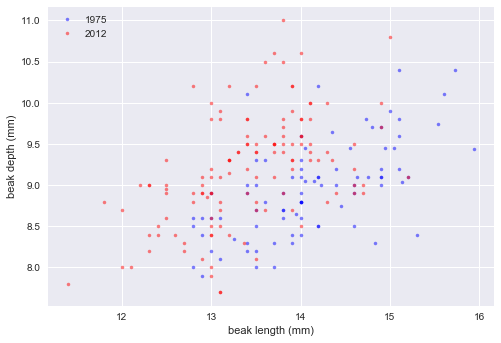

In [30]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

The red dots tend to be higher than the blue ones, indicating increased beak depth.  However, if anything, the red dots are---on the whole---left of the blue ones, which suggests that beak length may have decreased over time.

Next, we do linear regression (least squares) on the samples from 1975 and 2012, and on 1,000 bootstrap replicates for each of 1975 and 2012.  Based on the replicates, we compute confidence intervals for slope and y-intercept for each year.

In [31]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012,bd_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169161 conf int = [ 0.33019369  0.59551908]
1975: intercept = 2.39087523658 conf int = [ 0.55644672  4.2644406 ]
2012: slope = 0.462630358835 conf int = [ 0.32946832  0.59966654]
2012: intercept = 2.97724749824 conf int = [ 1.15019519  4.73707838]


The slope in 1975 is about the same as that in 2012.  By contrast, the y-intercept is about 0.6 mm higher.  Remember that the y-axis measures beak depth.

Now we will plot regression lines, including those generated by the actual data.

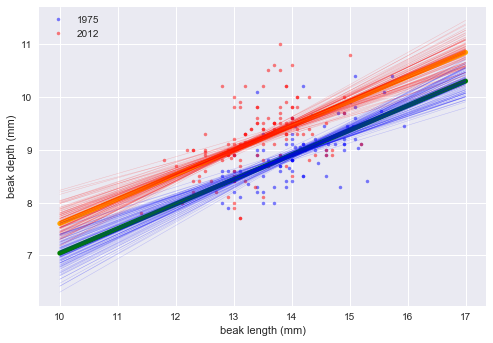

In [32]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines
x = np.array([10,17])

# Plot thick lines determined by the sample data; slope-intercept form!
plt.plot(x, slope_1975 * x + intercept_1975,
             linewidth=5, alpha=1, color='green')
plt.plot(x, slope_2012 * x + intercept_2012,
             linewidth=5, alpha=1, color='orange')

# Plot the first 100 of the bootstrap lines for each year
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

To study the overall beak shape for the scadens species, we consider the ratio of beak length to beak depth.  Specifically, we compare the mean length-to-depth ratio in 1975 with that in 2012.  We then resample ratio_1975 (see below) 10,000 times, computing the mean each time; and do the same for 2012.  Finally, we compute 99% confidence intervals for this ratio in each year.

In [33]:
print(len(bl_1975))
print(len(bl_2012))

# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

87
127
1975: mean ratio = 1.57888237719 conf int = [ 1.55683114  1.60148205]
2012: mean ratio = 1.46583422768 conf int = [ 1.44415104  1.48751001]


Note that the 99% confidence intervals for 1975 and 2012 don't overlap at all.  The lower ratio in 2012 is presumably attributable mostly to increased beak depth yet unchanged beak length.

Now for each species, we compare (average) beak depth of parents to (average) beak depth of their offspring.

In [34]:
scandens_parent_offspring = pd.read_csv('scandens_beak_depth_heredity.csv')
bd_parent_scandens = np.array(scandens_parent_offspring.mid_parent)
bd_offspring_scandens = np.array(scandens_parent_offspring.mid_offspring)

In [38]:
fortis_parent_offspring = pd.read_csv('fortis_beak_depth_heredity.csv')
bd_parent_fortis_male = np.array(fortis_parent_offspring['Male BD'])
bd_parent_fortis_female = np.array(fortis_parent_offspring['Female BD'])
bd_offspring_fortis = np.array(fortis_parent_offspring['Mid-offspr'])
print(len(bd_parent_fortis_male))
print(len(bd_parent_fortis_female))

413
413


In [41]:
bd_parent_fortis = (bd_parent_fortis_male + bd_parent_fortis_female) / 2
print(bd_parent_fortis)

[ 10.1     9.55    9.4    10.25   10.125   9.7     9.05    7.4     9.
   8.65    9.625   9.9     9.55    9.05    8.35   10.1    10.1     9.9
  10.225  10.     10.55   10.45    9.2    10.2     8.95   10.05   10.2
   9.5     9.925   9.95   10.05    8.75    9.2    10.15    9.8    10.7
  10.5     9.55   10.55   10.475   8.65   10.7     9.1     9.4    10.3
   9.65    9.5     9.7    10.525   9.95   10.1     9.75   10.05    9.9    10.
   9.1     9.45    9.25    9.5    10.     10.525   9.9    10.4     8.95
   9.4    10.95   10.75   10.1     8.05    9.1     9.55    9.05   10.2    10.
  10.55   10.75    8.175   9.7     8.8    10.75    9.3     9.7     9.6
   9.75    9.6    10.45   11.     10.85   10.15   10.35   10.4     9.95
   9.1    10.1     9.85    9.625   9.475   9.      9.25    9.1     9.25
   9.2     9.95    8.65    9.8     9.4     9.      8.55    8.75    9.65
   8.95    9.15    9.85   10.225   9.825  10.      9.425  10.4     9.875
   8.95    8.9     9.35   10.425  10.     10.175   9.875  

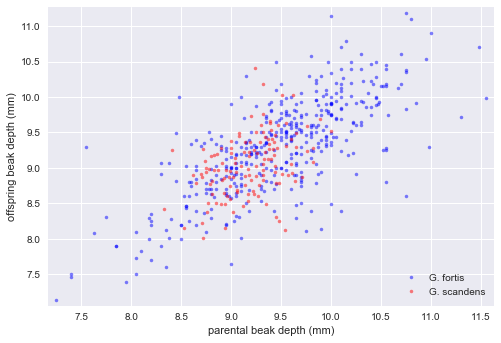

In [42]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

Examining the scatter plot above, we see a strong positive correlation between parental beak depth and offspring beak depth for the fortis species.  On the other hand, for scandens, parental and offspring beak depth seem to be clustered in the middle.

We next compute the Pearson correlation coefficient for the fortis sample and for the scandens sample.  We then determine 95% confidence intervals for the fortis correlation coefficient and for the scandens correlation coefficient, by means of joint resampling (bootstrap style).

In [44]:
# Compute the Pearson correlation coefficients from the observed data
r_scandens = pearson_r(bd_parent_scandens,bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,pearson_r,1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,pearson_r,1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294 [ 0.26036262  0.53875133]
G. fortis: 0.728341239552 [ 0.67037564  0.77850291]


The results are consistent with our expectations.  The correlation is substantially stronger for the fortis species than for the scandens species, with disjoint confidence intervals.

Now we use a modified measure of heritability of beak depth.  The Pearson coefficient is calculated by dividing the covariance of parent and offspring beak depth by the product of their individual standard deviations.  We now divide the covariance only by the variance of the parent array.

In [45]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[1,0] / covariance_matrix[0,0]

# Compute the heritability from the observed data
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.548534086869 [ 0.34414663  0.74764048]
G. fortis: 0.722905191144 [ 0.6440095   0.79833918]


Using this new measure of heritability doesn't affect the results for the fortis species.  But for scandens, the heritability is higher than the Pearson coefficient; and now, the two confidence intervals do overlap.  Still, heritability remains markedly higher in fortis than scandens.

Clearly, there's strong heritability of beak depth in the fortis species.  To judge heritability in scandens, we perform a hypothesis test.  The null hypothesis is that there is no heritability.  We permute the array containing (average) parent beak depth, 10000 times.  This breaks the correspondence between the parents and their offspring.  Each time we compute the heritability between the permuted array and the array of observed offspring beak depth.

In [46]:
# Initialize array of replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,bd_offspring_scandens)

# Compute p-value
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


The p-value of 0 strongly indicates heritability of beak depth for scandens, despite the fact that the heritability coefficient for scandens is lower than that for fortis.